In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

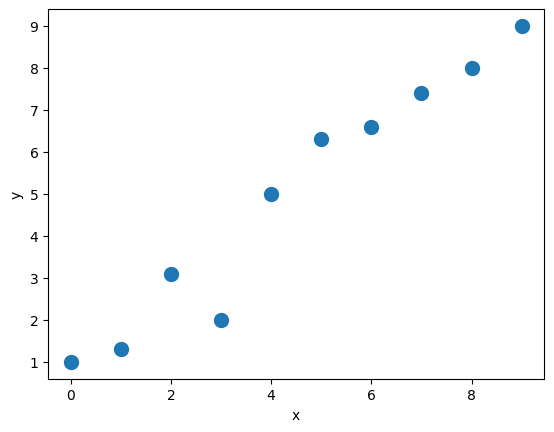

In [2]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
## TODO: normalize data
X_train_norm =
## TODO: pytorch accepts tensor instead of numpy data, so we need transfer
X_train_norm =
## TODO: so is y
y_train =
# To feed the data into the networks, we need create a dataset
train_ds = TensorDataset(X_train_norm, y_train)
# In case the data is large, we can split into batches
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
len(train_dl)

5

In [ ]:
train_dl.batch_size

2

In [ ]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def loss_fn(input, target):
    ## TODO: define the loss for least squares


def model(xb):
    ## TODO: given input xb, need the model output


learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        ## TODO: need calculate the gradient to update parameters


        with torch.no_grad():
            ## TODO: update and reset gradient


    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 54.4459
Epoch 10  Loss 26.6861
Epoch 20  Loss 14.7747
Epoch 30  Loss 21.1890
Epoch 40  Loss 14.6957
Epoch 50  Loss 19.7220
Epoch 60  Loss 1.2443
Epoch 70  Loss 13.1094
Epoch 80  Loss 8.4891
Epoch 90  Loss 4.3804
Epoch 100  Loss 3.9785
Epoch 110  Loss 5.4690
Epoch 120  Loss 0.1450
Epoch 130  Loss 2.4366
Epoch 140  Loss 3.9358
Epoch 150  Loss 1.1941
Epoch 160  Loss 1.7712
Epoch 170  Loss 1.0116
Epoch 180  Loss 1.2025
Epoch 190  Loss 0.9808


Final Parameters: 2.4309542179107666 4.2993645668029785


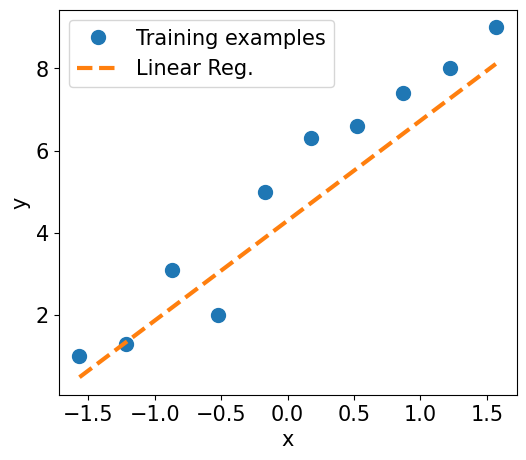

In [ ]:
print('Final Parameters:', weight.item(), bias.item())

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
## TODO: need normalize data and feed it into the model
X_test_norm =
## TODO: output for X_test_norm
y_pred =

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.savefig('training_LS.pdf')

plt.show()

Now we use nn to train the model

In [ ]:
import torch.nn as nn
## TODO: determine the input and output size
input_size =
output_size =
model = nn.Linear(input_size, output_size)
## TODO: what loss should we use?
loss_fn =

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions

        # 2. Calculate loss

        # 3. Compute gradients

        # 4. Update parameters using gradients

        # 5. Reset the gradients to zero

    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 43.4341
Epoch 10  Loss 20.9163
Epoch 20  Loss 15.0002
Epoch 30  Loss 0.2223
Epoch 40  Loss 24.6367
Epoch 50  Loss 18.8138
Epoch 60  Loss 24.5340
Epoch 70  Loss 11.4962
Epoch 80  Loss 3.2025
Epoch 90  Loss 6.5843
Epoch 100  Loss 6.8088
Epoch 110  Loss 8.4566
Epoch 120  Loss 1.7748
Epoch 130  Loss 0.1984
Epoch 140  Loss 2.5184
Epoch 150  Loss 1.6353
Epoch 160  Loss 1.3537
Epoch 170  Loss 0.4488
Epoch 180  Loss 1.6395
Epoch 190  Loss 0.7331


Final Parameters: 2.281066417694092 4.282294273376465


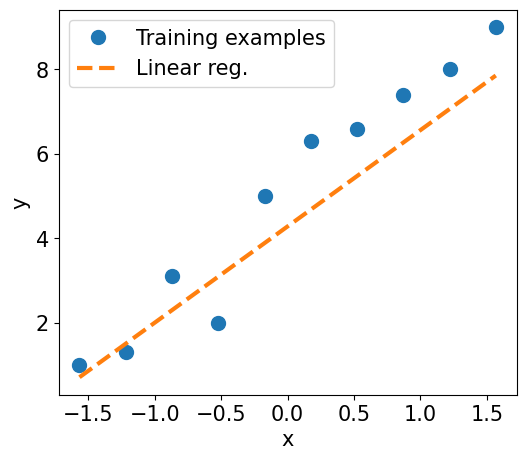

In [ ]:
print('Final Parameters:', model.weight.item(), model.bias.item())

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
## TODO: same as earlier
X_test_norm =
y_pred =


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm.detach().numpy(), y_train.detach().numpy(), 'o', markersize=10)
plt.plot(X_test_norm.detach().numpy(), y_pred.detach().numpy(), '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

We see either manual update or via built-in nn works well and the results are almost identical.  

The above project is for regression and the folloing one is  classifying MNIST hand-written digits

In [ ]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset


image_path = './'
transform = transforms.Compose([transforms.ToTensor()])

mnist_train_dataset = torchvision.datasets.MNIST(root=image_path,
                                           train=True,
                                           transform=transform,
                                           download=True)
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path,
                                           train=False,
                                           transform=transform,
                                           download=False)

batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)

In [ ]:
import torch.nn as nn
hidden_units = [32, 16]
## TODO: how can we obtain the input size of first linear layer
input_size =
all_layers = [nn.Flatten()]
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit
## TODO: add last linear layer
all_layers.append()
model = nn.Sequential(*all_layers)

model


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): ReLU()
  (5): Linear(in_features=16, out_features=10, bias=True)
)

In [ ]:
## TDDO: what loss function should be used
loss_fn =
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

torch.manual_seed(1)
num_epochs = 20
for epoch in range(num_epochs):
    accuracy_hist_train = 0
    for x_batch, y_batch in train_dl:
        ## TODO: step 1--5 should be implemented in each loop


        ## TODO: calculate how many predictions are correct
        is_correct =
        accuracy_hist_train += is_correct.sum()
    ## TODO: calculate the mean accuracy
    accuracy_hist_train
    print(f'Epoch {epoch}  Accuracy {accuracy_hist_train:.4f}')

Epoch 0  Accuracy 0.9938
Epoch 1  Accuracy 0.9936
Epoch 2  Accuracy 0.9946
Epoch 3  Accuracy 0.9937
Epoch 4  Accuracy 0.9943
Epoch 5  Accuracy 0.9951
Epoch 6  Accuracy 0.9939
Epoch 7  Accuracy 0.9954
Epoch 8  Accuracy 0.9952
Epoch 9  Accuracy 0.9947
Epoch 10  Accuracy 0.9948
Epoch 11  Accuracy 0.9957
Epoch 12  Accuracy 0.9956
Epoch 13  Accuracy 0.9959
Epoch 14  Accuracy 0.9960
Epoch 15  Accuracy 0.9960
Epoch 16  Accuracy 0.9954
Epoch 17  Accuracy 0.9952
Epoch 18  Accuracy 0.9975
Epoch 19  Accuracy 0.9966


In [ ]:
pred = model(mnist_test_dataset.data / 255.)
print(f"pred shape is: {pred.shape}")
print(f"mnist_test_dataset.targets is: {mnist_test_dataset.targets.shape}")
## TODO: calculate testing accuracy
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}')

pred shape is: torch.Size([10000, 10])
mnist_test_dataset.targets is: torch.Size([10000])
Test accuracy: 0.9599
